# APS 8

Entrega: 28/11 ao final do atendimento (17:15)

## Questão 1

Assuma que $X$ seja uma variável aleatória contínua que descreve o preço de um multímetro digital em uma loja brasileira qualquer. Ainda, assuma que o preço médio seja igual a $R\$ 45,00$ e o desvio padrão, igual a $R\$ 25,00$.

Em todos os itens a seguir, deixe claro como foi construído o novo preço em função de $X$.

Deixe todas as contas claramente indicadas.

a) Se todas as lojas brasileiras que vendem multímetro resolvessem acrescentar 15 reais no preço de cada um dos seus respectivos multímetros. Nesse caso, qual o novo preço médio do multímetro e respectivo desvio padrão?

b) Se todas as lojas brasileiras que vendem multímetro resolvessem aumentar o preço de cada um dos seus respectivos multímetros em $150\%$. Nesse caso, qual o novo preço médio do multímetro e respectivo desvio padrão?

c) Se você precisa comprar dez multímetros e deseja comprá-los todos iguais e na mesma loja. Nesse caso, qual o gasto total esperado e respectivo desvio padrão?

parte em cederno do ex.1 :
<img src="aps-8-1.jpg">

## Questão 2

	
	
Assuma que, na disciplina Ciência dos dados, a nota final da disciplina seja função da nota média das provas $X$ e da nota média dos projetos $Y$. Assuma ainda que ambas as notas tem mesmo peso na construção da nota final na disciplina.


Considerando que a nota média dos alunos nas provas segue uma normal com média 4 e desvio padrão igual a 1,5, ou seja $ X \sim N(4 ; 2,25)$ . E que a nota média dos alunos nos projetos segue uma normal com média 7 e desvio padrão igual a 1, ou seja, $Y\sim N(7 ; 1)$.


Na prática, é razoável acreditar que haja uma associação positiva entre essas notas. Aqui, considere que a covariância entre essas notas médias é igual a $0,675$ .

Em todos os itens a seguir, deixe todas as contas claramente indicadas. 


a) Calcule a nota média final e respectivo desvio padrão.
   
 b) Considere que a nota final na disciplina Ciência dos dados segue uma distribuição com média e variância obtidas no item anterior.      Calcule a probabilidade de um aluno ser aprovado na disciplina.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

%matplotlib inline

parte no caderno do ex.2 :
<img src="aps-8-2.jpg">

In [10]:
# b)

w=(stats.norm.cdf(5, loc=5.5, scale=1.072)) #prob de X <=5 
prob_pass=1-w
prob_pass

print("prob de passar é de:", prob_pass*100, "%")

prob de passar é de: 67.9541803081 %


### Dataset para as questões de programação

Vamos trabalhar com o problema *House Sales in King County*, do Kaggle
[https://www.kaggle.com/harlfoxem/housesalesprediction](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [5]:
houses = pd.read_csv("casas.csv")

In [6]:
houses.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,grade
0,540000.0,4,2.50,2600,9935,2.0,0,8
1,815000.0,3,3.75,2780,5002,2.0,0,10
2,279000.0,3,2.25,2070,7800,1.0,900,7
3,360000.0,2,2.50,1233,1244,2.0,270,7
4,309000.0,3,2.50,1990,3614,2.0,0,7


## Q3

O dataset fornecido é uma amostra extraída de um dataset maior. A amostra pode ter vindo de uma população com média de `sqft_lot` de 8250? 

Passos:

**a)** Verifique que `sqft_lot` **não** é normal.

Dica: na *APS 7* foi feito um teste de normalidade. Repita o mesmo processo

**b)**  Se `sqft_lot` fosse normal, que tipo de teste poderíamos ter usado?

**c)** Saberíamos $\mu$ para montar o t? Saberíamos $\sigma$?


**Bootstrap**:

**d)** Monte um intervalo percentil boostrap de $95\%$.

**e)** Informe os valores inferiores e superiores

**f)** Conclua o teste


- OBS. pessoal: Caso em que se quer testar hipótese sobre a média populacional, através da média amostral, sem se saber o desvio padrão, logo deve-se resolver assumindo um desvio padrão "s" e aplicando uma distribuição t-student para testar a a hipótese.

In [7]:
# a) teste de normalidade  #fit da curva

((array([-2.3041488 , -1.9474555 , -1.73875672, -1.58628365, -1.46371296,
         -1.35987397, -1.26892666, -1.1874133 , -1.11310799, -1.04448844,
         -0.98046451, -0.92022672, -0.86315599, -0.8087671 , -0.75667176,
         -0.70655357, -0.65815059, -0.61124291, -0.56564343, -0.52119116,
         -0.47774596, -0.4351846 , -0.39339758, -0.35228669, -0.31176295,
         -0.271745  , -0.23215772, -0.1929311 , -0.15399923, -0.11529947,
         -0.07677169, -0.03835758,  0.        ,  0.03835758,  0.07677169,
          0.11529947,  0.15399923,  0.1929311 ,  0.23215772,  0.271745  ,
          0.31176295,  0.35228669,  0.39339758,  0.4351846 ,  0.47774596,
          0.52119116,  0.56564343,  0.61124291,  0.65815059,  0.70655357,
          0.75667176,  0.8087671 ,  0.86315599,  0.92022672,  0.98046451,
          1.04448844,  1.11310799,  1.1874133 ,  1.26892666,  1.35987397,
          1.46371296,  1.58628365,  1.73875672,  1.9474555 ,  2.3041488 ]),
  array([  871,   953,  1005,  1060,

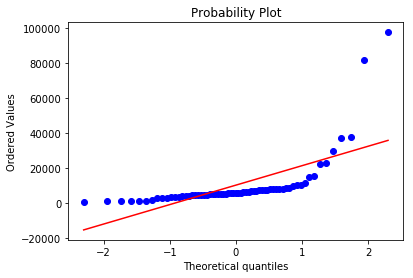

In [8]:
stats.probplot(houses.sqft_lot, dist="norm", plot=plt)

a) sqft_lot não tem distribuição normal.

Dado este caso em que a distribuição não é normal, não se pode aplicar a técnica de distribuição T-student.

b) Se a distribuição de "sqft_lot" fosse normal poderiamos aplicar a técnica de t-student com inferência de desvio padrão

c) Neste caso iriamos inferir o μ como 8250 segundo o enunciado, e σ seria inferido e representado como "s" para testar a hipótese de se a média populacinal de sqft_lot é de 8250, com alto coeficiente de confiança e ao mesmo tempo alto grau de liberdade, graças ao tamanho da amostra.

In [12]:
# d) 

dados=houses.sqft_lot
n = len(dados)

xbarra = np.mean(dados)
dp = np.std(dados,ddof=1)

print("Média: ", xbarra)
print("Desvio padrão amostral: ", dp)

Média:  10292.538461538461
Desvio padrão amostral:  16122.868507454057


In [13]:
n=10       #tamanho das reamostras
xbarra_Boot = []
s_boot=[]

B = 10000
for i in range(B):
    # Gera uma reamostra dos dados _com_ reposição
    amostra = np.random.choice(dados, size=n, replace=True)
    xbarraB = np.mean(amostra)
    s=np.std(amostra)
    xbarra_Boot.append(xbarraB)
    s_boot.append(s)

In [15]:
#Intervalo de confiança Bootstrap Percentil (ou Quantil)
#Confiança = 0.95

Lim_infa= np.percentile(xbarra_Boot, 2.5)
Lim_sup = np.percentile(xbarra_Boot, 97.5)
print('Limite inferior:', Lim_infa)
print('Limite superior:', Lim_sup)

print("")

Lim_infa_desvpad= np.percentile(s_boot, 2.5)
Lim_sup_desvpad = np.percentile(s_boot, 97.5)
print('Limite inferior do desvio padrão:', Lim_infa_desvpad)
print('Limite superior do desvio padrão :', Lim_sup_desvpad)


Limite inferior: 4503.36
Limite superior: 23435.95

Limite inferior do desvio padrão: 1724.59204647
Limite superior do desvio padrão : 33270.6127053


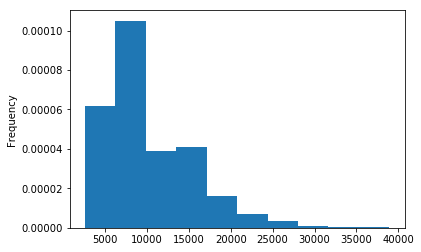

In [16]:
#Distribuição Bootstrap 
pd.Series(xbarra_Boot).plot.hist(normed=True, legend=False);


In [18]:
if xbarra<Lim_sup and xbarra>Lim_infa:
    print("Aceita hipótese")
    
else:
    print("Rejeita hipótese")

Aceita hipótese


## Q4

Faça uma regressão que usa `sqft_living` como variável explicativa  e `price` como resultado: 

**a).** De acordo com a notação que usamos em aula, quem é $\hat{\beta_0}$ e quem é $\hat{\beta_1}$ ?

**b).** Interprete o $R^2$ , os valores $P > |t|$ e também *Prob (F-statistic)*.

**c).** Escreva a equação que expressa `price` em função de `sqft_living`.

**d).** Faça um gráfico de dispersão de `price` em função de `sqft_living`, plote a equação que encontrou no item anterior no mesmo gráfico


In [20]:
dados=houses.sqft_living

## Q5

Faça agora uma regressão múltipla que tenta prever `price` (variável explicada) em função das variáveis `sqft_lot`  e `sqft_basement` (explicativa).

Dica: inclua as duas colunas dentro de uma variável `X`, o restante não se altera em relação à regressão simples.


```python
Y = houses['price']
X = houses.loc[:, ['sqft_lot', 'sqft_basement']]
```

Pede-se:

**a).** Repita a intepretação dos valores $P > |t|$ e Prob (F-statistic) porém com duas variáveis.

O que os valores encontrados implicam para a regressão?


**b).** Escreva a função que foi encontrada pela regressão ( `price` em função de  `sqft_lot`  e `sqft_basement`)